<h1 align="center">Logistic Regression</h1> 

В области машинного обучения одним из самых популярных методов бинарной классификации (предсказываем один из двух классов для каждого объекта) является логистическая регрессия, лог регрессия настраивается с помощью метода максимального правдоподобия, который приводит к следующей задаче оптимизации:

$$ L(w, X, y) = \sum_{i = 0}^{N} log (1 + exp(-y_ix_i^Tw)) + \frac{1}{2} ||w||^2-> \min_w$$
$$X \in R^{N \times M}, x \in R^{M}, w \in R^{M}, y \in \{-1, 1\}^N$$

когда мы решили задачу оптимизации (нашли $w$), мы принимаем решение о том, к какому классу относится объект по правилу $y(x) = sign(x^Tw)$. В данной части вам необходимо применить методы линейной алгебры для решения этой задачи. 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами, если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Чем лог-регрессия отличается от svm?

<Ответ>

**Вопрос 2**: Почему считается что регуляризатор мешает переобучаться? Что такое переобучение?

<Ответ>

**Вопрос 3**: Почему лог-регрессия это классификатор?

<Ответ>

### Лог-регрессия своими руками

In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Для тестирования правильности вычисления сгенерируем аргументы, небольшого размера
w, X, y = np.random.random(4), np.random.random((5, 4)), 2*(np.random.randint(0, 2, 5)-0.5)

### Шаг 1

Запрограммируйте вычисление функции L, используйте только матричные операции (внутри не должно быть циклов -- циклы спрятанны в матричные умножения).

**Замечание**: Нигде в промежуточных вычислениях не стоит вычислять значение $exp(−y_ix^Tw)$, иначе может произойти переполнение. Вместо этого следует напрямую вычислять необходимые величины с помощью специализированных для этого функций: `np.logaddexp` для `ln(1 + exp(·))` и `sp.special.expit` для `1/(1 + exp(·))`.

In [3]:
def logistic(w, X, y):
    """
        logistic(w, X, y) вычисляет функцию качества лог регрессии L(w, X, y)
        
        w: np.array размера (M,)
        X: np.array размера (N, M)
        y: np.array размера (M,)
        
        funcw: np.float 
    """
    funcw = np.logaddexp( -np.dot(X,w)*y ,np.array([0]*len(y)) ).sum()+(1.0/2*w**2).sum()
    return funcw

In [4]:
isinstance(logistic(w, X, y), float) # Результат число, этож функция потерь.

True

In [5]:
np.logaddexp( -np.dot(X,w)*y ,np.array([0]*len(y)) )

array([ 0.38938311,  1.42181717,  1.05098371,  0.35132814,  1.34466901])

In [6]:
print np.dot(X,w)
print np.dot(X,w)*y
print np.log (np.exp(-np.dot(X,w)*y)+[1]*len(y))

[ 0.7421905   1.14570105  0.6208257   0.86523287  1.04271766]
[ 0.7421905  -1.14570105 -0.6208257   0.86523287 -1.04271766]
[ 0.38938311  1.42181717  1.05098371  0.35132814  1.34466901]


In [7]:
np.logaddexp( -np.dot(X,w)*y ,np.array([0]*len(y)) )

array([ 0.38938311,  1.42181717,  1.05098371,  0.35132814,  1.34466901])

In [8]:

print y
print X
print 
print w
print 
print np.dot(X,w)
a= ( (special.expit(np.dot(X,w)*y) *(-y)).reshape(len(y),1) *X).sum(axis=0) 
#print a 
#print  logistic_grad(w, X, y)

[ 1. -1. -1.  1. -1.]
[[ 0.0696829   0.70607283  0.07973398  0.68577734]
 [ 0.14586518  0.71301576  0.88288617  0.35733883]
 [ 0.18365072  0.20505024  0.42155977  0.34450044]
 [ 0.13936096  0.80984456  0.10440466  0.68827822]
 [ 0.47456526  0.715149    0.38247117  0.21792441]]

[ 0.72801862  0.5494945   0.58190231  0.37487318]

[ 0.7421905   1.14570105  0.6208257   0.86523287  1.04271766]


### Шаг 2

Найдите градиент функции $\nabla_w L(w, X, y)$, запишите в терминах матричных операций, эффективно запрограммируйте вычисленный градиент.

In [9]:
def logistic_grad(w, X, y):
    """
        logistic_grad(w, X, y) вычисляет градиент функции качества лог регрессии dL(w, X, y)/dw
        
        w: np.array размера (M,)
        X: np.array размера (N, M)
        y: np.array размера (M,)
        
        gradw: np.array размера (M,)
    """
    gradw = np.zeros_like(w) # Вычислите градиент функции dL/dw
    gradw= ((1/(1+np.exp(np.dot(X,w)*y))*-y).reshape(len(y),1) *X).sum(axis=0) +w 
    return gradw

In [10]:
assert(logistic_grad(w, X, y).shape == w.shape) # Результат вектор, этож градиент.


In [11]:
print y 
print special.expit(np.dot(X,w)*y)
(1/(1+np.exp(np.dot(X,w)*y))*-y).reshape(len(y),1) *X 

[ 1. -1. -1.  1. -1.]
[ 0.67747467  0.24127518  0.34959368  0.70375279  0.26062596]


array([[-0.0224745 , -0.22772637, -0.02571623, -0.22118056],
       [ 0.11067153,  0.54098275,  0.66986765,  0.27112184],
       [ 0.11944759,  0.13336597,  0.27418514,  0.22406526],
       [-0.0412853 , -0.23991419, -0.03092959, -0.2039005 ],
       [ 0.35088123,  0.5287626 ,  0.28278926,  0.16112765]])

In [12]:
( (special.expit(np.dot(X,w)*y) *(-y)).reshape(len(y),1) *X)

array([[-0.0472084 , -0.47834646, -0.05401775, -0.46459678],
       [ 0.03519365,  0.172033  ,  0.21301852,  0.08621699],
       [ 0.06420313,  0.07168427,  0.14737463,  0.12043518],
       [-0.09807567, -0.56993037, -0.07347507, -0.48437772],
       [ 0.12368403,  0.18638639,  0.09968192,  0.05679676]])

### Шаг 3

Очень часто при подсчёте градиента допускаются ошибки, проверьте правильность реализации подсчёта градиента с помощью функции scipy.optimize.check_grad, ошибка должна быть ~ 1e-8 или меньше.

In [13]:
from scipy.optimize import check_grad

func = lambda w: logistic(w, X, y)
grad = lambda w: logistic_grad(w, X, y)

print('error = %s' % check_grad(func, grad, w))

error = 4.32047444946e-08


### Шаг 4

А теперь найдем $w$ используя метод оптимизации optimize.fmin_l_bfgs_b применим к реальным данным.

In [29]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score as acc
from scipy import optimize

X, y = make_classification(n_features=20, n_informative=3, n_classes=2, )
y = 2*(y - 0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print X_train.shape

(75, 20)


In [31]:

w = np.zeros_like(X[0]) # Начальное значение параметров w
func = lambda w: logistic(w, X_train, y_train)
grad = lambda w: logistic_grad(w, X_train, y_train)

a=optimize.fmin_l_bfgs_b(func=func,x0=w,fprime=grad)

w =a[0]

In [32]:
print('train acc = ', acc(np.sign(X_train.dot(w)), y_train), 'test acc = %s' % acc(np.sign(X_test.dot(w)), y_test))

('train acc = ', 0.92000000000000004, 'test acc = 0.84')


### Шаг 5, Давайте визуализируем наш метод, а то хочется глазами посмотреть

In [34]:
from scipy import optimize

def expand(X):
    X_ = np.zeros((X.shape[0], 6))
    X_[:,0:2] = X
    X_[:,2:4] = X**2
    X_[:,4] = X[:,0] * X[:,1]
    X_[:,5] = 1;
    return X_

def visualize(X, y, w, loss, n_iter, h=0.01):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    plt.clf()
    Z = classify(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1,2,1)
    plt.contourf(xx, yy, Z, cmap='rainbow', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.subplot(1,2,2)
    plt.plot(loss)
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
def viz_opt(func, gradf, X, y, n_iter=10, lr=1e-3):
    a = None
    loss1 = np.zeros(n_iter)
    plt.figure(figsize=(12,5))
    ind = np.arange(X.shape[0])
    
    w = np.zeros(X.shape[1])
    
    for i in range(n_iter):        
        loss1[i] += func(w)
        visualize(X, y, w, loss1, n_iter)
        
        fvalx, gradx = func(w), grad(w)
        w = optimize.fmin_l_bfgs_b(func, w, approx_grad=grad)[0]
        
    visualize(X, y, w, loss1, n_iter)
    
    q = plt.clf()
    plt.show()

In [35]:
from sklearn.datasets import make_moons, make_circles, make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2)
X += np.random.random(X.shape)

datasets = [make_moons(noise=0.1), make_circles(noise=0.1, factor=0.5), (X, y)]

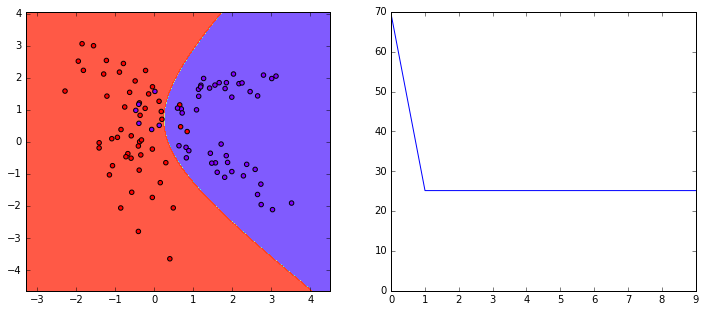

In [36]:
from IPython import display

def classify(X, w):
    return np.sign(1.0 / (1.0 + np.exp(-X.dot(w))) - 0.5)

func = lambda w: logistic(w, X, y)
grad = lambda w: logistic_grad(w, X, y)

for X, y in datasets:
    X, y = expand(X), -2*(y-0.5)
    a = viz_opt(func, grad, X, y) 

### Шаг 6 Сдать ДЗ

In [37]:
X = np.array([
    [ 0.11276959,  0.44971499,  0.9923867 ,  0.89212961],
    [ 0.82695301,  0.30505746,  0.40539034,  0.68335903],
    [ 0.98938714,  0.34498564,  0.36259562,  0.46714136],
    [ 0.46335495,  0.62208345,  0.95386954,  0.41550278],
    [ 0.91471692,  0.69649708,  0.82290076,  0.86441013]])

w = np.array([ 0.45920206,  0.24257981,  0.96715112,  0.21759684])
y = np.array([-1., -1., -1., -1.,  1.])

In [38]:
# Заполните форму https://goo.gl/forms/nRSQuIk8olbmVRIi1 

print('значение функции потерь %.2f'   % logistic(w, X, y))
print('значение суммы градиентов %.2f' % logistic_grad(w, X, y).sum())

значение функции потерь 6.58
значение суммы градиентов 8.41
